In [1]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from jupyter_dash import JupyterDash 
import statsmodels.api as sm
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import dash_bootstrap_components as dbc
from dash import dcc, html
from dash.dependencies import Input, Output

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset
df = pd.read_csv("cyberattack_distribution_2023.csv")

# Create a bar chart
fig3 = px.bar(
    df,
    x='Percentage',
    y='Industry',
    title='Distribution of Cyberattacks Across Industries in 2023',
    labels={'Percentage': 'Percentage (%)', 'Industry': 'Industry'},
    color='Percentage',
    text='Percentage',
    color_continuous_scale=px.colors.sequential.Viridis
)

# Update layout for better appearance
fig3.update_layout(
    xaxis=dict(title='Percentage (%)'),
    yaxis=dict(title='Industry'),
    width=1250,
    height=500
)

# Show the plot
fig3.show()


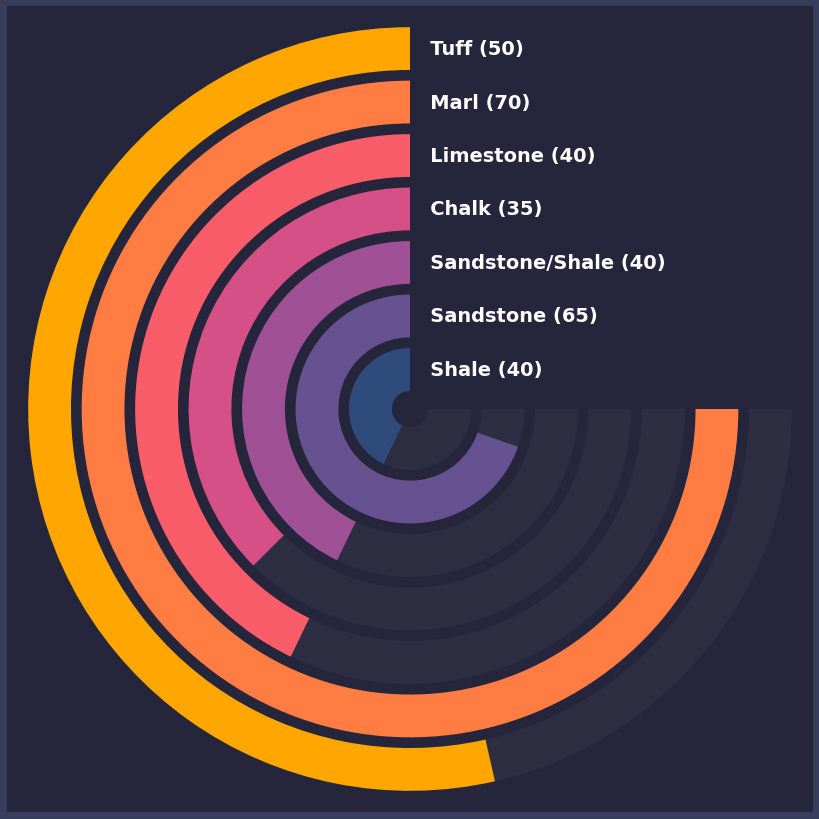

In [3]:
import numpy as np
lith_dict = {'LITH': ['Shale', 'Sandstone', 
                      'Sandstone/Shale', 'Chalk', 
                      'Limestone', 'Marl', 'Tuff'],
             'COUNT': [40,65, 40, 35, 
                            40, 70, 50]}

df = pd.DataFrame.from_dict(lith_dict)

# Get key properties for colours and labels
max_value_full_ring = max(df['COUNT'])

ring_colours = ['#2f4b7c', '#665191', '#a05195','#d45087',
               '#f95d6a','#ff7c43','#ffa600']

ring_labels = [f'   {x} ({v}) ' for x, v in zip(list(df['LITH']), 
                                                 list(df['COUNT']))]
data_len = len(df)

# Begin creating the figure
fig = plt.figure(figsize=(10,10), linewidth=10,
                 edgecolor='#393d5c', 
                 facecolor='#25253c')

rect = [0.1,0.1,0.8,0.8]

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)

# Loop through each entry in the dataframe and plot a grey
# ring to create the background for each one
for i in range(data_len):
    ax_polar_bg.barh(i, max_value_full_ring*1.5*np.pi/max_value_full_ring, 
                     color='grey', 
                     alpha=0.1)
# Hide all axis items
ax_polar_bg.axis('off')
    
# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0, 1, 2, 3, 4, 5, 6], 
                    labels=ring_labels, 
                    angle=0, 
                    fontsize=14, fontweight='bold',
                    color='white', verticalalignment='center')

# Loop through each entry in the dataframe and create a coloured 
# ring for each entry
for i in range(data_len):
    ax_polar.barh(i, list(df['COUNT'])[i]*1.5*np.pi/max_value_full_ring, 
                  color=ring_colours[i])


# Hide all grid elements for the    
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=False, bottom=False, 
                   labelbottom=False, labelleft=True)

plt.show()

In [4]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv("cybercrime_costs.csv")

# Filter the DataFrame to only include years from 2008 onwards
df_filtered = df[df['Year'] >= 2008]

fig5 = go.Figure()

fig5.add_trace(go.Bar(
    y=df_filtered['Year'].astype(str),
    x=-df_filtered['Hourly Financial Losses'],
    name='Hourly Financial Losses',
    marker_color='yellow',
    orientation='h',
    hovertemplate='%{x:,.0f} losses',
    marker=dict(line=dict(width=1, color='white')),
))

fig5.add_trace(go.Bar(
    y=df_filtered['Year'].astype(str),
    x=df_filtered['Hourly Count of Victims'],
    name='Hourly Count of Victims',
    marker_color='red',
    orientation='h',
    hovertemplate='%{x} victims',
    marker=dict(line=dict(width=1, color='white')),
))

fig5.update_layout(
    title='Yearly Growth of Cybercrime Costs',
    barmode='overlay',
    xaxis_title='Hourly Financial Losses / Count of Victims',
    yaxis_title='Year',
    xaxis=dict(showgrid=True),
    yaxis=dict(autorange="reversed"),  # Automatically reverse the order of years
    template='plotly_dark',
    hovermode='y',
    width=1250,
    height=500,
    legend=dict(title_text='Metrics', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
)

fig5.show()


In [5]:
# Define the file path for the dataset
file_path = 'Cyber_Threat_Rate.csv'

# Read the data from the CSV file
data = pd.read_csv(file_path)

# Transform the DataFrame to long format
data_long = pd.melt(data, id_vars=['Country Code', 'Country Name_x', 'Continent_x'],
                    var_name='Year', value_name='Cyber Threat Rate')

# Ensure 'Year' is a string
data_long['Year'] = data_long['Year'].astype(str)

# Filter the data to include only from 2015 onwards
data_long_filtered = data_long[data_long['Year'].astype(int) >= 2015]

# Plotting the animated choropleth map for Cyber Threats (2015 onwards)
fig1 = px.choropleth(
    data_long_filtered,
    locations='Country Code',
    color='Cyber Threat Rate',  # Using 'Cyber Threat Rate' as the color
    hover_name='Country Name_x',
    animation_frame='Year',
    color_continuous_scale='Reds',  # Changing the scale from white to red
    title='Cyber Threat Rate Over Time [2015-2022]',
    projection='natural earth'
)

# Customize layout and increase size of the map
fig1.update_layout(
    geo=dict(
        showcoastlines=True,
        coastlinecolor="Black",
        showland=True,
        landcolor="LightGray",
        showocean=True,
        oceancolor="LightBlue",
        showlakes=True,
        lakecolor="LightBlue"
    ),
    coloraxis_colorbar_title='Cyber Threat Rate',  # Adjusting the color bar title
    title_font_size=24,
    title_font_family='Arial',
    width=1250,  # Maintain the map width
    height=450   # Maintain the map height
)

# Show the plot
fig1.show()


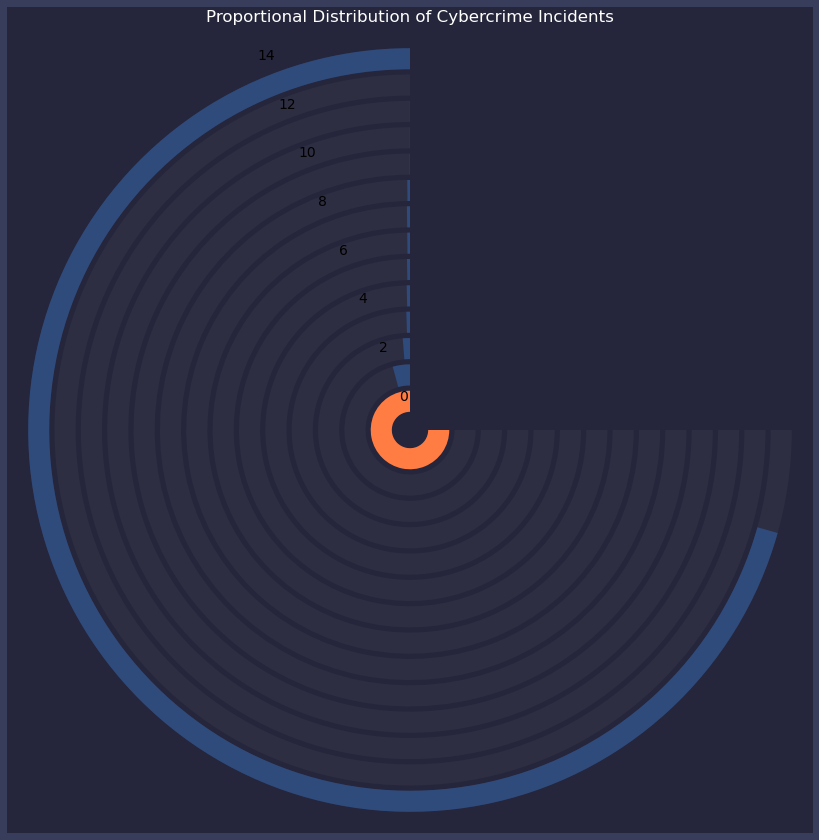

In [6]:
# Load data into pandas dataframe
phishing_df = pd.read_csv('phishing_incidents.csv')

# Identify the index of the category with the highest incidents
max_index = phishing_df['Incidents Count'].idxmax()

# Get key properties for colours and labels
max_value_full_ring = max(phishing_df['Incidents Count'])

# Prepare color list and labels
ring_colours = ['#2f4b7c' if i != max_index else '#ff7c43' for i in range(len(phishing_df))]  # Highlight max index
ring_labels = [f'{category} ({count})' for category, count in zip(phishing_df['Category'], phishing_df['Incidents Count'])]

# Data length
data_len = len(phishing_df)

# Begin creating the figure
fig = plt.figure(figsize=(10, 10), linewidth=10, edgecolor='#393d5c', facecolor='#25253c')
rect = [0.1, 0.1, 0.8, 0.8]

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)

# Loop through each entry in the dataframe and plot a grey ring for the background
for i in range(data_len):
    ax_polar_bg.barh(i, max_value_full_ring * 1.5 * np.pi / max_value_full_ring, color='grey', alpha=0.1)

# Hide all axis items
ax_polar_bg.axis('off')

# Add axis for radial chart
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)

# Set the angular ticks to match the number of categories
angles = np.linspace(0, 2 * np.pi, data_len, endpoint=False).tolist()
ax_polar.set_xticks(angles)  # Set the angle locations
ax_polar.set_xticklabels(ring_labels, fontsize=12, fontweight='bold', color='white')  # Set the labels

# Loop through each entry in the dataframe and create a coloured ring for each entry
for i in range(data_len):
    ax_polar.barh(i, phishing_df['Incidents Count'][i] * 1.5 * np.pi / max_value_full_ring, color=ring_colours[i])

# Hide all grid elements
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=False, bottom=False, labelbottom=False, labelleft=True)

# Set title
plt.title("Proportional Distribution of Cybercrime Incidents", color='white')

# Show the plot
plt.show()


In [7]:
# Define the file path for the dataset
file_path = 'Cyber_Threat_Rate.csv'

# Read the data from the CSV file
data = pd.read_csv(file_path)

# Transform the DataFrame to long format
data_long = pd.melt(data, id_vars=['Country Code', 'Country Name_x', 'Continent_x'],
                    var_name='Year', value_name='Cyber Threat Rate')

# Ensure 'Year' is a string
data_long['Year'] = data_long['Year'].astype(str)

# Filter the data to include only from 2015 to 2022
data_long_filtered = data_long[(data_long['Year'].astype(int) >= 2015) & (data_long['Year'].astype(int) <= 2022)]

# Function to get the highest Cyber Threat Rate per continent per year, including South Africa
def get_highest_country_per_continent(df):
    # Get the highest country from each continent
    highest_countries = df.loc[df.groupby(['Year', 'Continent_x'])['Cyber Threat Rate'].idxmax()]

    # Ensure South Africa is included in the results
    sa_data = df[df['Country Name_x'] == 'South Africa']
    sa_data = sa_data[sa_data['Year'].isin(highest_countries['Year'])]
    
    # Combine the two datasets
    combined_data = pd.concat([highest_countries, sa_data]).drop_duplicates()
    return combined_data

# Get the highest country from each continent per year, including South Africa
highest_countries = get_highest_country_per_continent(data_long_filtered)

# Create the animated bar plot
fig2 = px.bar(
    highest_countries,
    x='Country Name_x',  # X-axis represents the countries
    y='Cyber Threat Rate',  # Y-axis represents cyber threat rates
    color='Continent_x',  # Different colors for different continents
    animation_frame='Year',  # Animation over the years
    animation_group='Country Name_x',  # Group animation by country
    title='Highest Cyber Threat Rate Country by Continent (2015-2022)',
    labels={'Country Name_x': 'Country', 'Cyber Threat Rate': 'Cyber Threat Rate'},
)

# Customize layout with specified height and width
fig2.update_layout(
    xaxis_title='Country',
    yaxis_title='Cyber Threat Rate',
    title_font_size=24,
    title_font_family='Arial',
    showlegend=True,  # Show legend to differentiate continents
    width=1250,  # Set the width of the plot
    height=550   # Set the height of the plot
)

# Show the plot
fig2.show()


In [8]:
import pandas as pd
import plotly.graph_objects as go

# Load the data from the CSV file
df = pd.read_csv('cybercrime_impact.csv')

# Convert Loss to numerical values for plotting (in dollars)
def convert_loss_to_numeric(loss_str):
    if 'B' in loss_str:
        return float(loss_str.replace('B', '').replace(',', '').strip()) * 1e9  # Convert to dollars
    elif 'M' in loss_str:
        return float(loss_str.replace('M', '').replace(',', '').strip()) * 1e6  # Convert to dollars
    else:
        return float(loss_str.replace(',', '').strip())

# Apply the conversion to the Loss column
df['Loss (Dollars)'] = df['Loss'].apply(convert_loss_to_numeric)

# Create the figure
fig4 = go.Figure()

# Add the 'Loss' data to the figure
fig4.add_trace(go.Bar(
    x=df['Cyber crime type'],
    y=df['Loss (Dollars)'],
    name='Total Loss ($)',
    marker_color='orange',
    yaxis='y1'
))

# Add the 'Victims' data to the figure
fig4.add_trace(go.Bar(
    x=df['Cyber crime type'],
    y=df['Victims'],
    name='Number of Victims',
    marker_color='blue',
    yaxis='y2'
))

# Create axes
fig4.update_layout(
    title='Cyber Crime Impact 2023: Total Loss vs. Number of Victims',
    xaxis_title='Cyber Crime Type',
    yaxis_title='Total Loss ($)',
    yaxis=dict(
        title='Total Loss ($)',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange'),
    ),
    yaxis2=dict(
        title='Number of Victims',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue'),
        overlaying='y',
        side='right'
    ),
    barmode='stack',  # Set the bar mode to stack
    width=1250,  # Set the width of the plot
    height=550,  # Set the height of the plot
)

# Show the figure
fig4.show()


In [9]:

df = pd.read_csv('cybercrime_victims_by_year_age.csv')

# Create the Sunburst Chart
sunburst_fig = px.sunburst(df, 
                       path=['Year', 'Age Group'], 
                       values='Victims Count', 
                       title='Cybercrime Victims by Year and Age Group (2015-2023)',
                       color='Victims Count',
                       color_continuous_scale='YlOrBr',  # Change this to a different color scale
                       branchvalues='total',
                       template='plotly_dark')
sunburst_fig.update_layout(
   
    width=1250,  # Set the width of the plot
    height=500,  # Set the height of the plot
)



# Show the chart
sunburst_fig.show()

In [10]:
# Create the app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.SLATE], suppress_callback_exceptions=True)

# Sidebar layout with full height and centered buttons
sidebar = html.Div(
    [
        html.Hr(),
        html.H6("Defending Your Data and Empowering Your Peace of Mind in a Connected World", style={'color': 'white', 'text-align': 'center', 'margin-bottom': '10px'}),
        dbc.Button("World Threats Analysis", href="/visuals1", id="visuals1-button", color="primary", className="mb-2", style={'border-radius': '25px', 'width': '150px'}),
        dbc.Button("Cyber_Threats Impact", href="/visuals2", id="visuals2-button", color="secondary", className="mb-2", style={'border-radius': '25px', 'width': '150px'}),
        html.H6("Fortifying Your Digital Frontier Against Evolving Threats", style={'color': 'white', 'text-align': 'center', 'margin-bottom': '10px'}),
        
    ],
    style={
        'width': '15%',
        'position': 'fixed', 
        'top': '0',  
        'right': '0', 
        'height': '100%',  
        'backgroundColor': '#343a40',
        'padding': '10px',
        'z-index': '10',  
        'display': 'flex',
        'flexDirection': 'column',
        'justifyContent': 'center',
        'alignItems': 'center'
    }
)

# Title of the dashboard
title = html.H1("The Cyber Sentinel: Safeguarding Your Digital World", style={
    'text-align': 'center', 
    'position': 'fixed', 
    'top': '10px', 
    'left': '50%', 
    'transform': 'translateX(-50%)', 
    'width': '100%', 
    'z-index': '999'
})

# Content layout with fixed height, adjusted for the sidebar
content = html.Div(id="page-content", style={
    'margin-right': '15%',
    'margin-left': '0',
    'margin-top': '60px', 
    'height': 'calc(100vh - 100px)',  
    'overflowY': 'auto',  
    'padding': '10px',  
    'z-index': '1',
})

# Define the first page visuals with proper spacing and centering
first = dbc.Container([
    dbc.Row(
        dbc.Col(dcc.Graph(figure=fig1, style={'width': '100%', 'height': '400px'}), width=12),
        justify="center",  # Center the graph
        style={'margin-bottom': '40px'}  # Space below fig1
    ),
    dbc.Row(
        dbc.Col(html.Hr(style={'border': '1px solid #ccc', 'margin-bottom': '20px'})),  # Divider
    ),
    dbc.Row(
        dbc.Col(dcc.Graph(figure=fig2, style={'width': '100%', 'height': '500px'}), width=12),
        justify="center",  # Center the graph
        style={'margin-bottom': '40px'}  # Space below fig2
    ),
    dbc.Row(
        dbc.Col(html.Hr(style={'border': '1px solid #ccc', 'margin-bottom': '20px'})),  # Divider
    ),
    dbc.Row(
        dbc.Col(dcc.Graph(figure=fig3, style={'width': '100%', 'height': '450px'}), width=12),
        justify="center",  # Center the graph
        style={'margin-bottom': '40px'}  # Space below fig3
    ),
], fluid=True)

# Define the second page visuals with proper spacing and centering
second = dbc.Container([
    dbc.Row(
        dbc.Col(dcc.Graph(figure=sunburst_fig, style={'width': '100%', 'height': '400px'}), width=12),
        justify="center",  # Center the graph
        style={'margin-bottom': '40px'}  # Space below sunburst_fig
    ),
    dbc.Row(
        dbc.Col(html.Hr(style={'border': '1px solid #ccc', 'margin-bottom': '20px'})),  # Divider
    ),
    dbc.Row(
        dbc.Col(dcc.Graph(figure=fig5, style={'width': '100%', 'height': '450px'}), width=12),
        justify="center",  # Center the graph
        style={'margin-bottom': '40px'}  # Space below fig5
    ),
    dbc.Row(
        dbc.Col(html.Hr(style={'border': '1px solid #ccc', 'margin-bottom': '20px'})),  # Divider
    ),
    dbc.Row(
        dbc.Col(dcc.Graph(figure=fig4, style={'width': '100%', 'height': '500px'}), width=12),
        justify="center",  # Center the graph
        style={'margin-bottom': '40px'}  # Space below fig4
    ),
], fluid=True)

# App layout
app.layout = html.Div([
    dcc.Location(id='url'),
    sidebar,
    title,
    content
])

# Callback to control navigation
@app.callback(Output("page-content", "children"), [Input("url", "pathname")])
def display_page(pathname):
    if pathname == "/visuals1" or pathname == "/":  
        return first  # Load the first visual for Water Analysis
    elif pathname == "/visuals2":
        return second  # Load the first visual for Water Impact
    else:
        return first  # Default to the first visual

# Run the app on a different port
if __name__ == "__main__":  
    app.run_server(debug=True, port=8020)
